# Greedy Algorithm

* 불가능한 문제, 즉 빠른 알고리즘 해법이 존재하지 않는 NP-완전문제를 다루는 법이다.
* 탐욕 알고리즘을 사용하기 위해서는 문제 해결이 가능한지 불가능한지 파악하는 것이 중요하다.
* 때로는 최적해가 아닐지라도 근사해를 구할 수 있는 알고리즘이다.
* 기본 아이디어는 각 단계에서 국소 최적해를 찾음으로써 최종적으로 전역 최적해를 구하는 것이다.

## Set covering problem
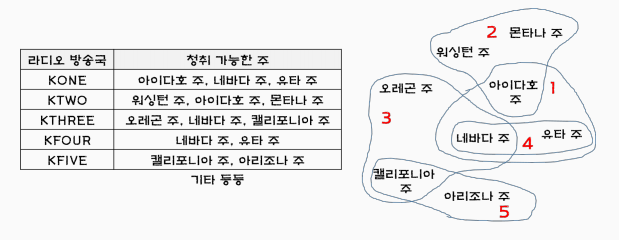
* 방송국을 방문하여 한 번 쇼를 하는데 돈이 들기 때문에 최대한 적은 수의 방송국을 돌아야 한다.
* 전국의 모든 사람들이 최소한 한 번은 쇼를 들을 수 있도록 하려면 어떤 방송국을 방문해야 할지 계산해야 한다.
    * 만약 가능한 모든 방송국의 부분 집합을 구하게 되면 방송국의 수는 총 n개이므로 O(2**n)의 시간복잡도를 가지게 된다.
* 이때는 근사알고리즘인 탐욕알고리즘을 사용하면 된다, 최적해는 아니지만 거의 정답과 비슷한 답을 유추하게 된다.
    * 아직 방송하지 않은 지역중 가장 많은 지역에 방송할 수 있는 방송국을 고른다. 이미 방송되고 있는 지역이 일부 포함되어 있어도 상관없다.
    * 남은 방송국죽에 다시 한번 가장 많은 지역에 방송할 수 있는 방송국을 고른다.
    * 모든 주에 방송이 될 때까지 선택을 반복한다.

In [1]:
states_needed = set(['nv','ut','id','mt','wa','or','ca','az'])
states_needed

{'az', 'ca', 'id', 'mt', 'nv', 'or', 'ut', 'wa'}

In [2]:
stations = {}
stations['kone'] = set(['id','nv','ut'])
stations['ktwo'] = set(['wa','id','mt'])
stations['kthree'] = set(['or','nv','ca'])
stations['kfour'] = set(['nv','ut'])
stations['kfive'] = set(['ca','az'])
stations

{'kone': {'id', 'nv', 'ut'},
 'ktwo': {'id', 'mt', 'wa'},
 'kthree': {'ca', 'nv', 'or'},
 'kfour': {'nv', 'ut'},
 'kfive': {'az', 'ca'}}

In [4]:
selected_stations = set()
while states_needed:
    best_station = None
    states_covered = set()
    for station, states in stations.items():
        covered = states & states_needed
        if len(states_covered) < len(covered):
            best_station = station
            states_covered = states
    selected_stations.add(best_station)
    states_needed -= states_covered
    
selected_stations

{'kfive', 'kone', 'kthree', 'ktwo'}

* 근사 알고리즘의 성능은 다음 두가지로 판단한다.
    * 얼마나 빠른가
    * 최적해에 얼마나 가까운가
* 위의 경우 탐욕알고리즘의 실행 속도는 O(n**2)이다.(n은 방송국의 수)

## knapsack problem

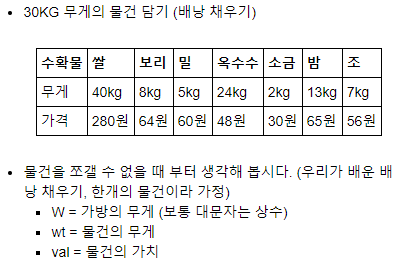

In [6]:
weight_of_items = {'쌀' : 40, '보리' : 8, '밀' : 5, '옥수수' : 24, '소금' : 2, '밤' : 13, '조' :7}
weight_of_items

{'쌀': 40, '보리': 8, '밀': 5, '옥수수': 24, '소금': 2, '밤': 13, '조': 7}

In [14]:
value_of_items = [('쌀', 280),('보리', 64),('밀', 60),('옥수수', 48),('소금',30),('밤',65),('조',56)]
value_of_items

[('쌀', 280),
 ('보리', 64),
 ('밀', 60),
 ('옥수수', 48),
 ('소금', 30),
 ('밤', 65),
 ('조', 56)]

In [15]:
def greedy(W, wt, val): #W는 가방의 무게
    knapsack = []
    weight = 0
    value = 0
    
    while weight < W:
        selected = max(val, key = lambda x : x[1])
        item = selected[0]
        if wt[item] < W - weight:
            knapsack.append(item)
            weight += wt[item]
            value += selected[1]
        val.remove(selected)
        if len(val) == 0:
            break
    return knapsack,weight, value

greedy(30, weight_of_items,value_of_items)

(['밤', '보리', '밀', '소금'], 28, 219)

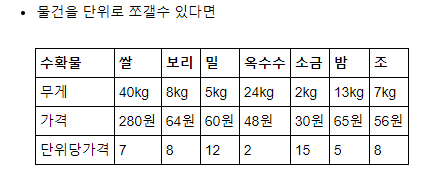

In [18]:
def fractional_greedy(W,wt,val):
    knapsack = []
    weight = 0
    value = 0
    
    while weight < W:
        selected = max(val, key = lambda x : x[1])
        item = selected[0]

        if wt[item] < W - weight:
            knapsack.append(item)
            weight += wt[item]
            value += selected[1] * wt[item]
        else:
            knapsack.append(item)
            weight2 = W - weight
            value += selected[1] * weight2
            weight += weight2
            break

        val.remove(selected)
        if len(val) == 0:
            break
    return knapsack, weight, value

unit_value_of_items = [("쌀", 7), ("보리", 8),("밀", 12),("옥수수", 2),("소금", 15),("밤", 5),("조", 8)]
fractional_greedy(30, weight_of_items, unit_value_of_items)

(['소금', '밀', '보리', '조', '쌀'], 30, 266)

## NP-완전 문제

* 대표적으로 위에서 다룬 set covering 문제
* 외판원 문제(TSP : Travel Salesman Problem) (경우의 수는 n!, n은 지역 개수)

### NP-완전 문제인지 알 수 있는 방법은?(특징)

* 위의 두 문제로 재정의 할 수 있다면 명백한 NP-완전 문제이다.
* 항목이 적을 때는 알고리즘이 빠른데, 항목이 늘어나면서 폭발적으로 경우의 수가 증가한다.
* 'X의 모든 조합'이라고 하면 보통 NP-완전 문제이다.
* 더 작은 하위 문제로 변환할 수 없어서 X의 가능한 모든 버전을 계산해야 한다면 아마도 NP-완전 문제일 것이다.

## 정리

* 탐욕 알고리즘은 전역 최적화를 목표로 하지만, 실제로는 국소 최적화를 한다.
* NP-완전 문제는 빠른 해답(최적해)이 없다.
* 만약 NP-완전 문제가 주어지면 근사 알고리즘을 쓰는 것이 최선이다.
* 탐욕 알고리즘은 작성하기도 쉽고 빠르기 때문에 좋은 근사 알고리즘 중 하나이다.